In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("assessment_ab.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


In [18]:
print(df.head())

print(df.info())

  Variant  Number of page views  GMV (in $)  Number of add to cart  \
0       A                     5         0.0                      0   
1       A                     4         0.0                      4   
2       A                     4         0.0                      2   
3       A                     5         0.0                      0   
4       A                     5         0.0                      3   

   Clicks on media  Time on Page (sec)  user_id  
0                2                  74        0  
1                1                  21        1  
2                0                   1        2  
3                1                  26        3  
4                3                  46        4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of pa

In [21]:
mean_summary = df.groupby('Variant').mean()

print(mean_summary)

         Number of page views  GMV (in $)  Number of add to cart  \
Variant                                                            
A                       4.985     7.68999                  1.884   
B                       5.317     9.28953                  2.469   

         Clicks on media  Time on Page (sec)  user_id  
Variant                                                
A                  1.495              20.543    499.5  
B                  1.324              20.047   1499.5  


In [ ]:
# Calculating the mean GMV for each variant

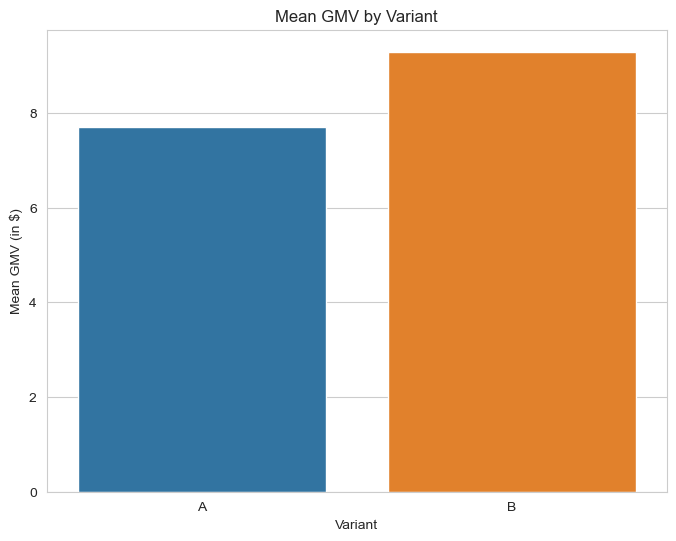

In [33]:
mean_gmv_by_variant = df.groupby('Variant')['GMV (in $)'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Variant', y='GMV (in $)', data=mean_gmv_by_variant)
plt.title('Mean GMV by Variant')
plt.xlabel('Variant')
plt.ylabel('Mean GMV (in $)')
plt.show()

In [ ]:
# Histogram for GMV by Variant

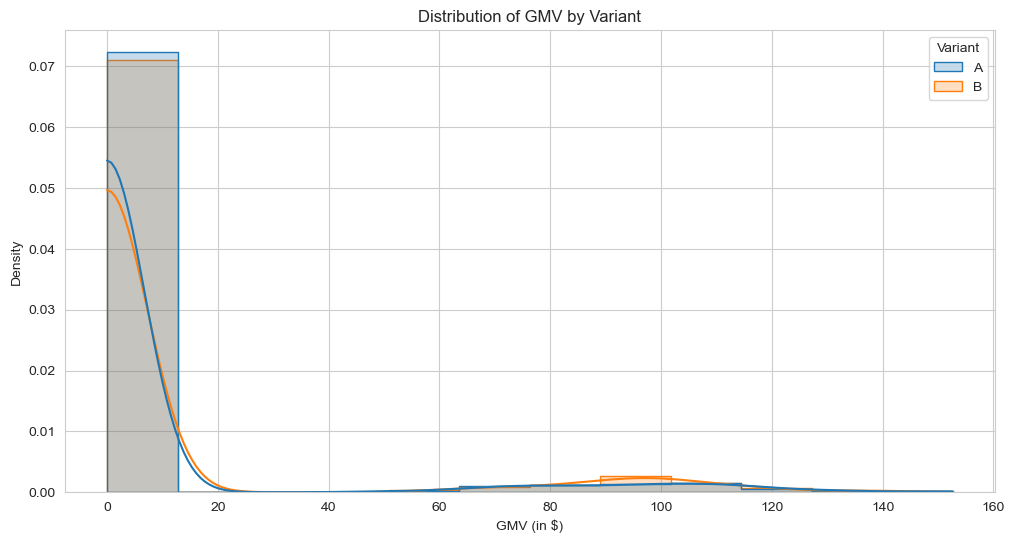

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(df, x='GMV (in $)', hue='Variant', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribution of GMV by Variant')
plt.xlabel('GMV (in $)')
plt.ylabel('Density')
plt.show()

In [ ]:
# Visualize the distribution of key metrics for the entire dataset

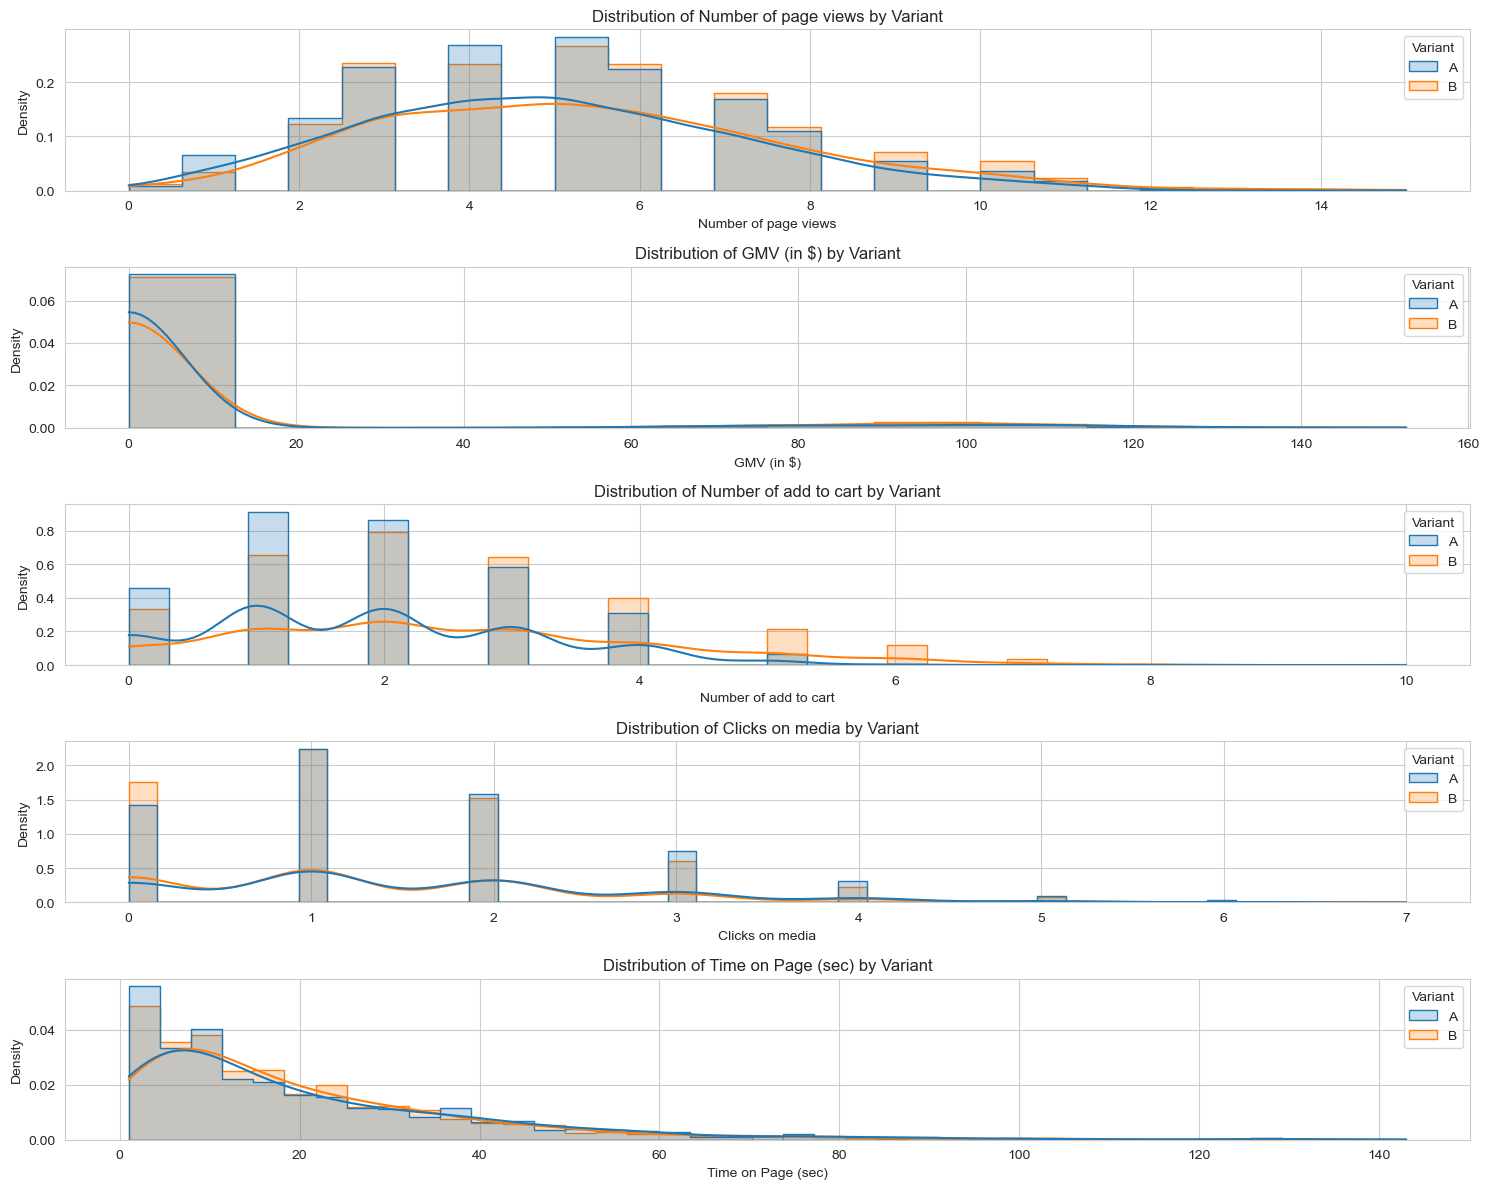

In [19]:
sns.set_style("whitegrid")

metrics = ['Number of page views', 'GMV (in $)', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']
plt.figure(figsize=(15, 12))
for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i+1)
    sns.histplot(df, x=metric, hue="Variant", kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {metric} by Variant')
plt.tight_layout()
plt.show()

In [ ]:
# Creating boxplots for each secondary metric

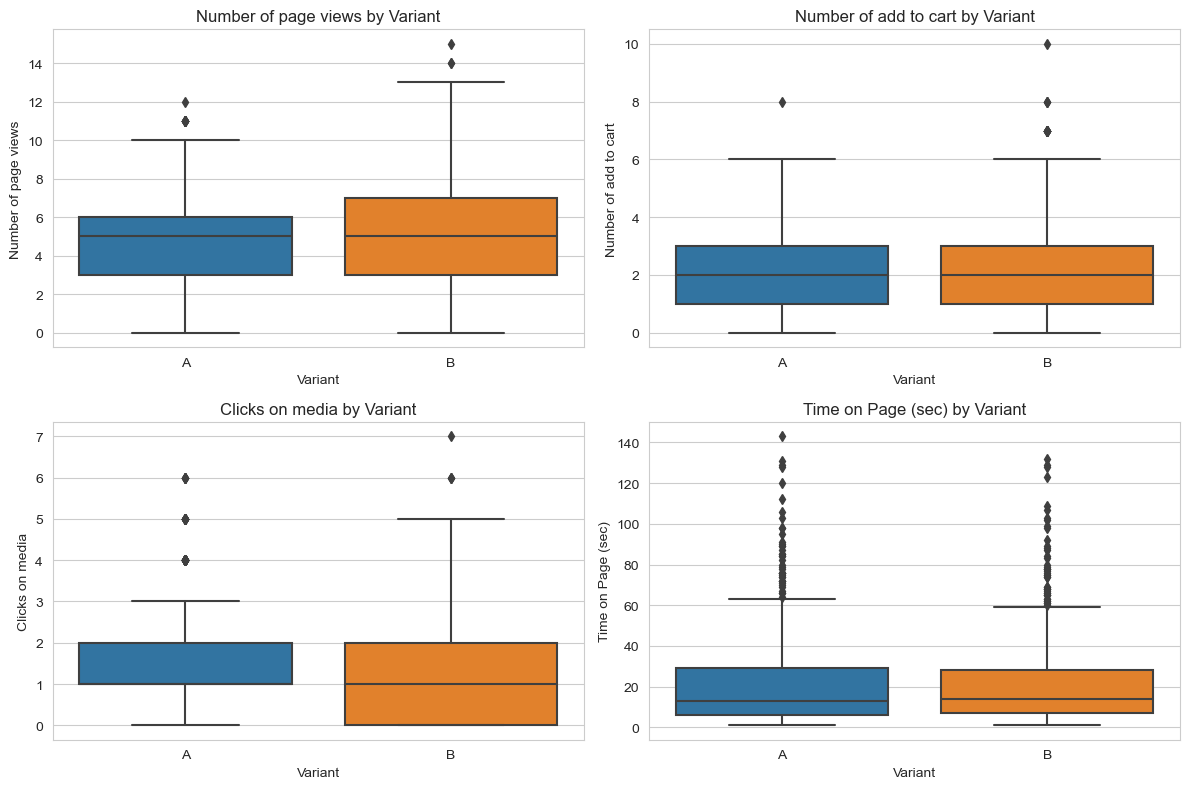

In [27]:
sns.set_style("whitegrid")

secondary_metrics = ['Number of page views', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']

plt.figure(figsize=(12, 8))
for i, metric in enumerate(secondary_metrics):
    plt.subplot(2, 2, i+1)  
    sns.boxplot(x='Variant', y=metric, data=df)
    plt.title(f'{metric} by Variant')

plt.tight_layout()
plt.show()

In [ ]:
# Conducting the two-sample t-test on the primary metric (GMV)

In [26]:

t_test_result = stats.ttest_ind(df[df['Variant'] == 'A']['GMV (in $)'],
                                df[df['Variant'] == 'B']['GMV (in $)'],
                                equal_var=True)  

t_statistic, p_value = t_test_result.statistic, t_test_result.pvalue

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in GMV between the two variants.")
else:
    print("There is no statistically significant difference in GMV between the two variants.")


T-statistic: -1.2839539769831623, P-value: 0.19930692918202245
There is no statistically significant difference in GMV between the two variants.


In [ ]:
# Conducting the two-sample t-test on the secondary metrics

In [31]:
from scipy.stats import ttest_ind, levene, shapiro

secondary_metrics = ['Number of page views', 'Number of add to cart', 'Clicks on media', 'Time on Page (sec)']


t_test_results = {}

for metric in secondary_metrics:
   
    data_a = df[df['Variant'] == 'A'][metric]
    data_b = df[df['Variant'] == 'B'][metric]
    
  
    normality_a = shapiro(data_a).pvalue > 0.05
    normality_b = shapiro(data_b).pvalue > 0.05
    

    equal_var = levene(data_a, data_b).pvalue > 0.05
    
   
    t_stat, p_val = ttest_ind(data_a, data_b, equal_var=equal_var)
    
   
    t_test_results[metric] = {'T-Statistic': t_stat, 'P-Value': p_val, 'Normality A': normality_a, 'Normality B': normality_b, 'Equal Variances': equal_var}


for metric, results in t_test_results.items():
    print(f"{metric}:\nT-Statistic: {results['T-Statistic']}, P-Value: {results['P-Value']}\nNormality A: {results['Normality A']}, Normality B: {results['Normality B']}, Equal Variances: {results['Equal Variances']}\n")


Number of page views:
T-Statistic: -3.188164513387701, P-Value: 0.0014539424660364982
Normality A: False, Normality B: False, Equal Variances: True

Number of add to cart:
T-Statistic: -8.777389396187948, P-Value: 3.668898697938531e-18
Normality A: False, Normality B: False, Equal Variances: False

Clicks on media:
T-Statistic: 3.1710702328903153, P-Value: 0.0015418189281850277
Normality A: False, Normality B: False, Equal Variances: True

Time on Page (sec):
T-Statistic: 0.5554299489081426, P-Value: 0.5786627940817111
Normality A: False, Normality B: False, Equal Variances: True

